## 深度学习入门5--生成模型--步骤6.神经网络
以pytorch为例，复现该书的代码步骤

In [13]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
print(torch.__version__)

2.8.0


In [4]:
## tensor
x = torch.tensor(5.0)
y = 3 * x ** 2
print(y)

tensor(75.)


In [6]:
## grad
# grad only support when float 
x = torch.tensor(5.0, requires_grad=True)
y = 3 * x ** 2
y.backward()
print(x.grad)

tensor(30.)


In [7]:
## find the minimum of function 'rosenblock' 
def rosenblock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

y = rosenblock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


In [8]:
## gradient descent method
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

lr = 0.001
iters = 10000

for i in range(iters):
    if i % 1000 == 0:
        print(x0.item(), x1.item())
    
    y = rosenblock(x0, x1)
    y.backward()


    ## .data: extract the real value of tensor instance
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    ## reset gradient
    x0.grad.zero_()
    x1.grad.zero_()

print(x0.item(), x1.item())

0.0 2.0
0.6837119460105896 0.4659528136253357
0.8263181447982788 0.6820318102836609
0.8947840929031372 0.8001903295516968
0.9334872364997864 0.8711214661598206
0.9569892883300781 0.9156519174575806
0.9718162417411804 0.9443121552467346
0.9813804626464844 0.9630323052406311
0.98763507604599 0.9753732085227966
0.9917610883712769 0.983556866645813
0.9944981336593628 0.9890044331550598


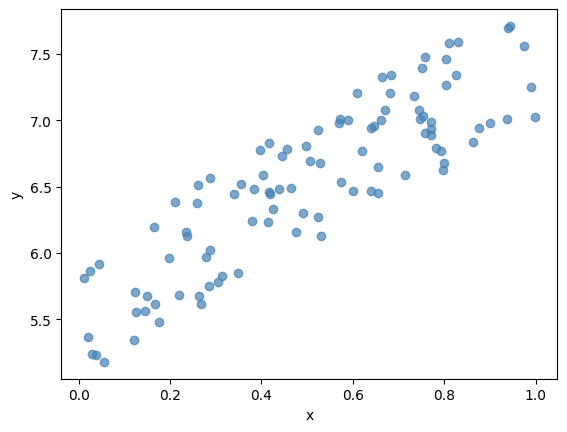

In [10]:
## linear regression
torch.manual_seed(1)
x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

## visualization
plt.scatter(x.numpy(), y.numpy(), color = 'steelblue', alpha = 0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [11]:
## toys dataset
torch.manual_seed(1)
x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

# create weight and bias
w = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# linear predict
def predict(x):
    return x @ w + b

0.09065637737512589
0.09057526290416718
0.09051060676574707
0.09045906364917755
0.09041798859834671
0.09038525819778442
0.09035913646221161
0.090338334441185
0.09032177180051804
0.09030856937170029
0.09029899537563324
====
w =  2.053179979324341
b =  5.498665809631348


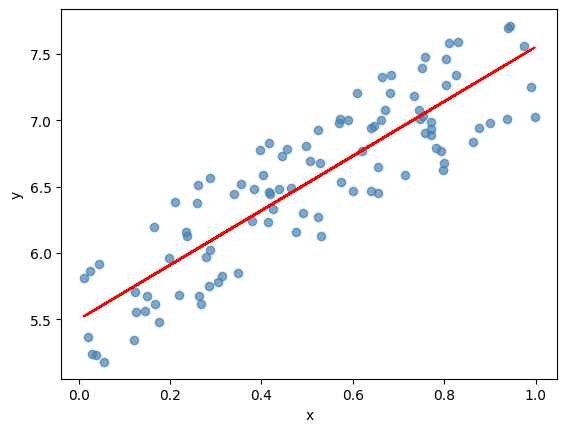

In [15]:
## back propagation for linear regression
def mse(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N

lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    loss = mse(y_hat, y) ## the same as 'loss = F.mse_loss(y_hat, y)'
    loss.backward()

    ## update
    w.data -= lr * w.grad.data
    b.data -= lr * b.grad.data

    ## reset gradient
    w.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0:
        print(loss.item())

print(loss.item())
print("====")
print('w = ', w.item())
print('b = ', b.item())

## visualization
plt.scatter(x.numpy(), y.numpy(), color = 'steelblue', alpha = 0.7)
plt.plot(x.numpy(), (w * x + b).detach().numpy(), color = "red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [17]:
## parameters
import torch.nn as nn
w = nn.Parameter(torch.zeros(1,1))
b = nn.Parameter(torch.zeros(1))

print(w)
print(b)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [18]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.zeros(1,1))
        self.b = nn.Parameter(torch.zeros(1))
    
    def forward(self):
        y = x @ self.w + self.b
        return y

model = Model()

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [20]:
class Model(nn.Module):
    def __init__(self, input_size = 1, output_size = 1):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)
    
model = Model()
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.8538]], requires_grad=True)
Parameter containing:
tensor([-0.3879], requires_grad=True)


In [ ]:
## optimizer
x = torch.rand(100, 1)
y = 2 ** x + 5 + torch.rand(100, 1)

lr = 0.1
iters = 100

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr = lr) ## also: 'torch.optim.Adam(model.parameters(), lr = lr)'

for i in range(iters):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

<function matplotlib.pyplot.show(close=None, block=None)>

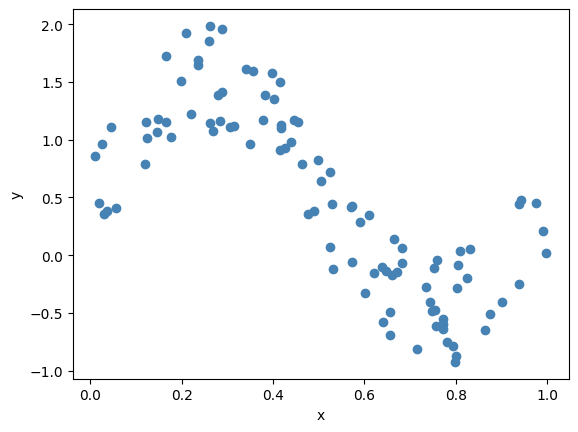

In [ ]:
## a neural network instance
torch.manual_seed(1)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

# visualization
plt.scatter(x.numpy(), y.numpy(), color = 'steelblue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
## model
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y

In [24]:
## train
lr = 0.2
iters = 10000

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

for i in range(iters):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i%1000 == 0:
        print(loss.item())

print(loss.item())

0.8147050738334656
0.2614705562591553
0.2446857988834381
0.20183584094047546
0.11892291158437729
0.09010763466358185
0.08845112472772598
0.08819553256034851
0.08802542090415955
0.08838497847318649
0.08756852895021439


In [31]:
## torchvision and datasets
import torchvision
print(torchvision.__version__)

0.23.0


100%|██████████| 9.91M/9.91M [02:59<00:00, 55.4kB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:25<00:00, 64.2kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 108kB/s]

size: 60000
type: <class 'PIL.Image.Image'>
label: 5


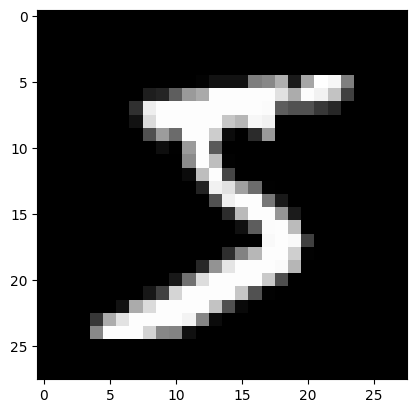

In [32]:
## load MNIST
dataset = torchvision.datasets.MNIST(
    root = './data',
    train = True,
    transform=None,
    download=True
)

x, label = dataset[0]

print('size:', len(dataset))
print('type:', type(x))
print('label:', label)

plt.imshow(x, cmap='grey')
plt.show()

In [34]:
## transform image into tensor
import torchvision.transforms as transforms
transform = transforms.ToTensor()

dataset = torchvision.datasets.MNIST(
    root = './data',
    train = True,
    transform=transform,
    download=True
)

x, label = dataset[0]
print('shape:', x.shape)
print('type:', type(x))

shape: torch.Size([1, 28, 28])
type: <class 'torch.Tensor'>


In [38]:
## dataloader
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 32,
    shuffle = True
)

for x, label in dataloader:
    print('x shape:', x.shape)
    print('label shape:', label.shape)
    break

x shape: torch.Size([32, 1, 28, 28])
label shape: torch.Size([32])
